In [1]:
!pip install pandas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Userbase.csv to Netflix Userbase.csv


In [4]:
df= pd.read_csv('Netflix Userbase.csv');

In [5]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


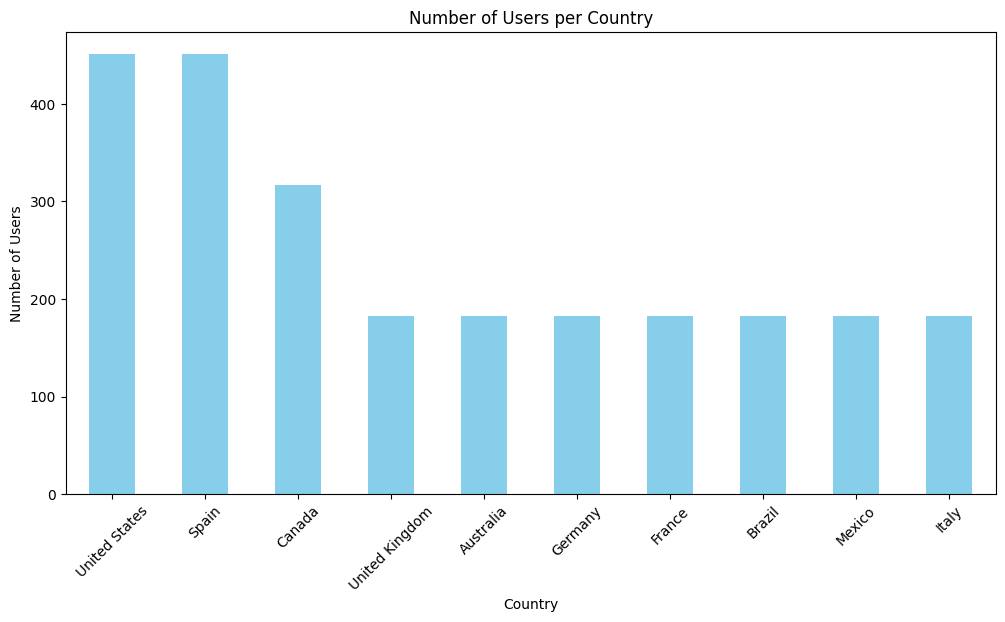

In [8]:
plt.figure(figsize=(12,6))
df['Country'].value_counts().plot(kind='bar',color='skyblue')
plt.title('Number of Users per Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

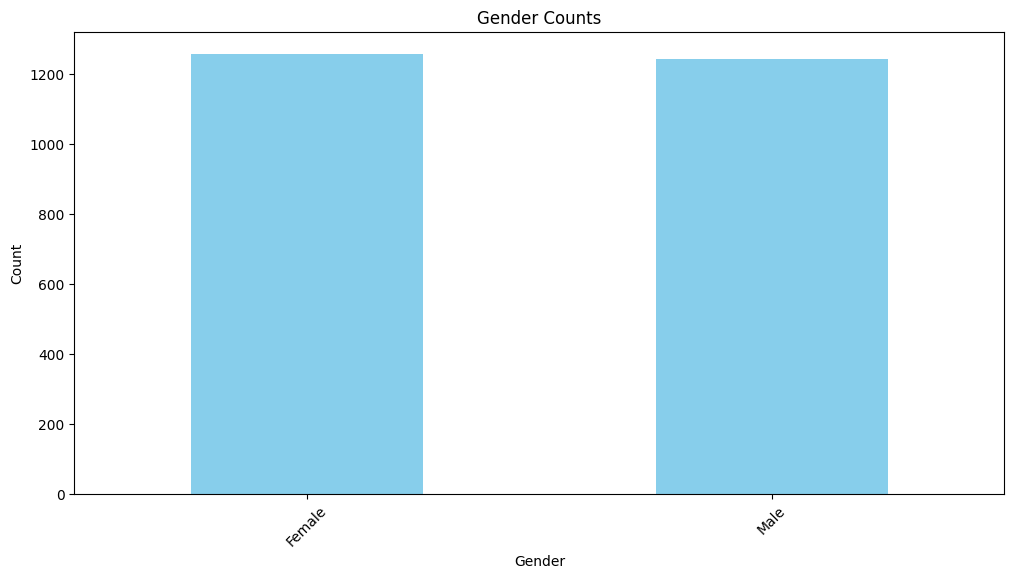

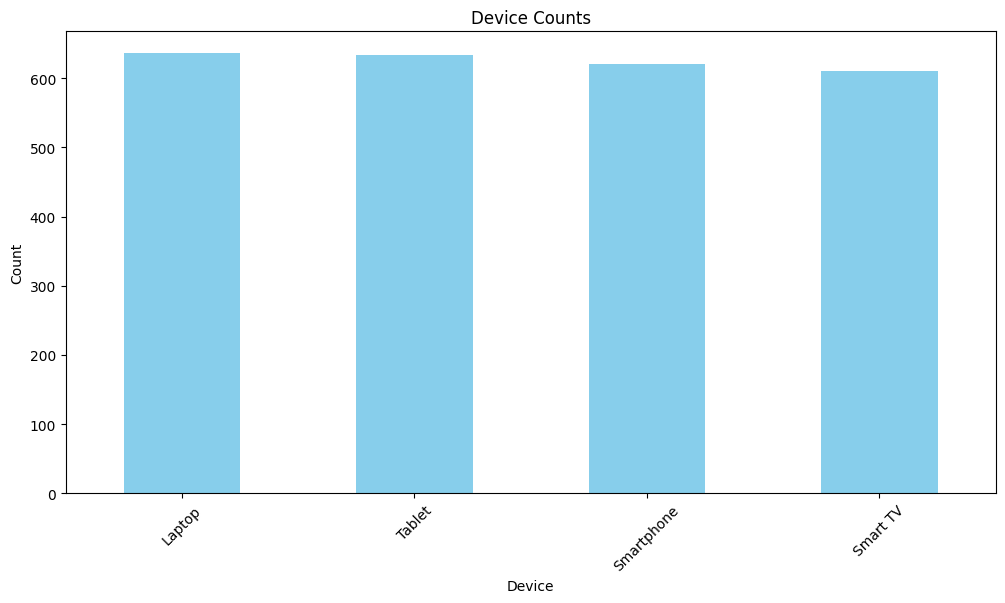

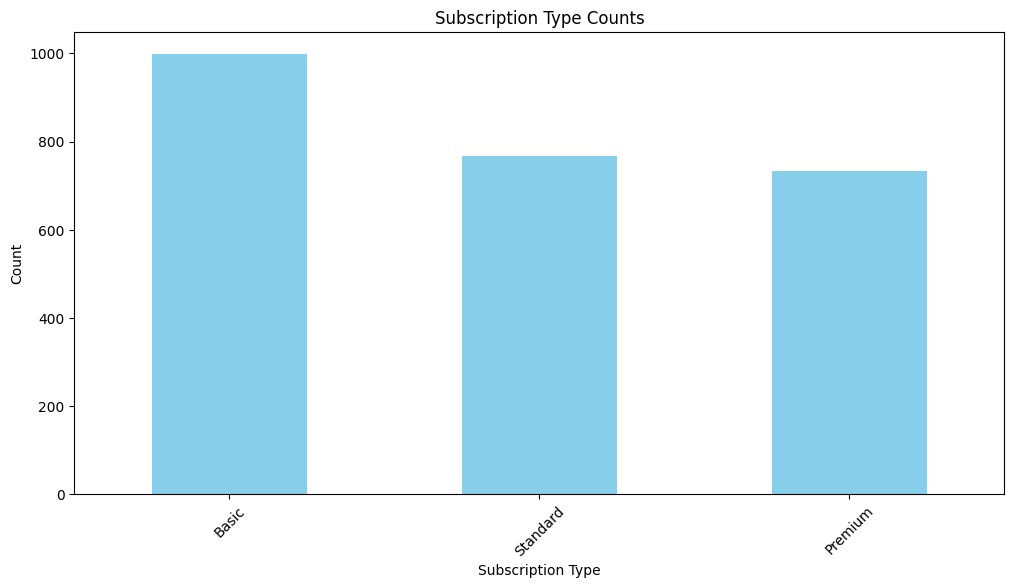

In [9]:
columns_titles= {
    'Gender': 'Gender Counts',
    'Device': 'Device Counts',
    'Subscription Type': 'Subscription Type Counts',
}

for column, title in columns_titles.items():
    plt.figure(figsize=(12,6))
    df[column].value_counts().plot(kind='bar',color='skyblue')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country', 'User Count']

import plotly.express as px

In [11]:
fig= px.choropleth(
    user_counts_by_country,
    locations='Country',
    locationmode='country names',
    color='User Count',
    hover_name='Country',
    title='User Distribution by Country',
    color_continuous_scale= px.colors.sequential.Plasma)


fig.update_layout(
    width=1000,
    height=700,
    title_font_size=24,
    geo=dict(showframe=False, showcoastlines=False,
)
)


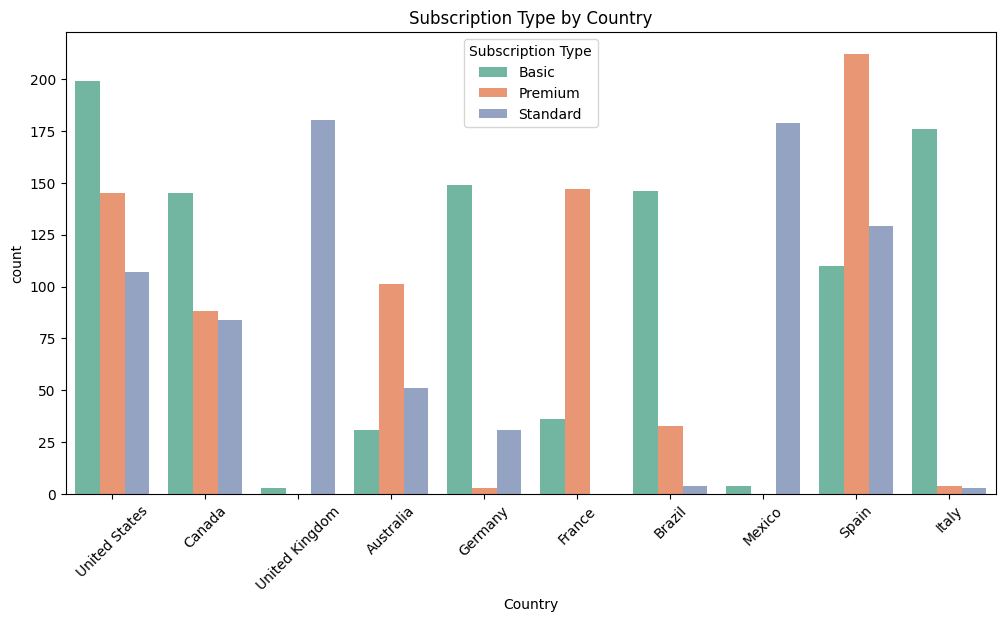

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue= 'Subscription Type', data=df, palette='Set2')
plt.title('Subscription Type by Country')

plt.xticks(rotation=45)
plt.show()

In [18]:
subs_by_country = df.pivot_table(index='Country',columns='Subscription Type',values='User ID', aggfunc='count', fill_value=0)
subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [19]:
subs_by_country ['Total'] = subs_by_country.sum(axis=1)
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


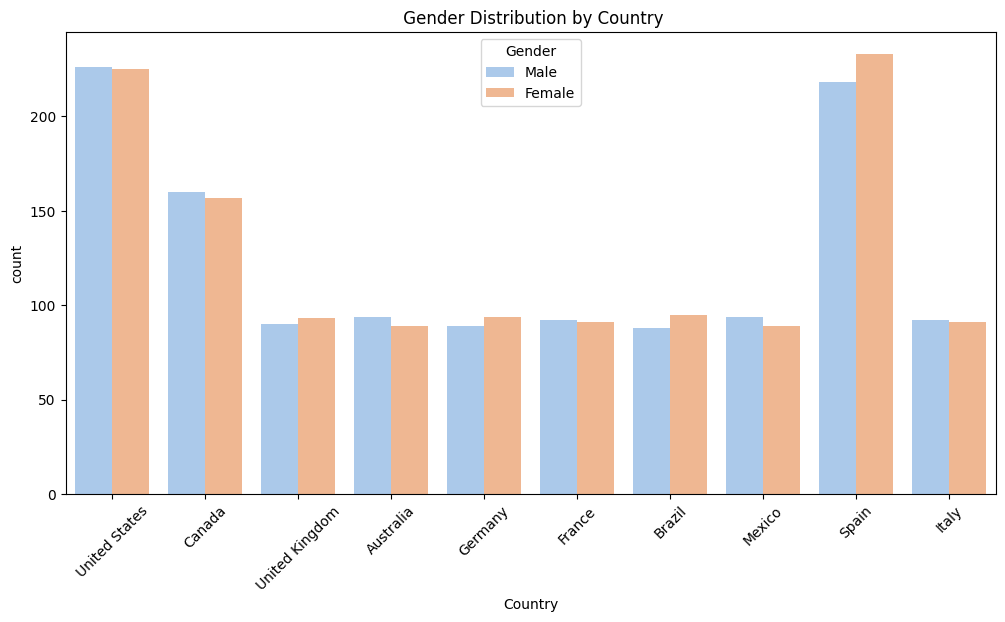

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Gender', data=df, palette='pastel')
plt.title(' Gender Distribution by Country')
plt.xticks(rotation=45)
plt.show()

In [22]:
gender_by_counttry = df.pivot_table(index='Country', columns='Gender', values='User ID', aggfunc='count', fill_value=0)
gender_by_counttry

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [23]:
subs_by_country_gender = df.pivot_table(index='Country', columns=['Subscription Type', 'Gender'], values='User ID', aggfunc='count', fill_value=0)
subs_by_country_gender


Subscription Type  Basic      Premium      Standard     
Gender            Female Male  Female Male   Female Male
Country                                                 
Australia             16   15      45   56       28   23
Brazil                78   68      16   17        1    3
Canada                68   77      40   48       49   35
France                17   19      74   73        0    0
Germany               80   69       1    2       13   18
Italy                 86   90       3    1        2    1
Mexico                 2    2       0    0       87   92
Spain                 60   50     113   99       60   69
United Kingdom         2    1       0    0       91   89
United States        103   96      72   73       50   57

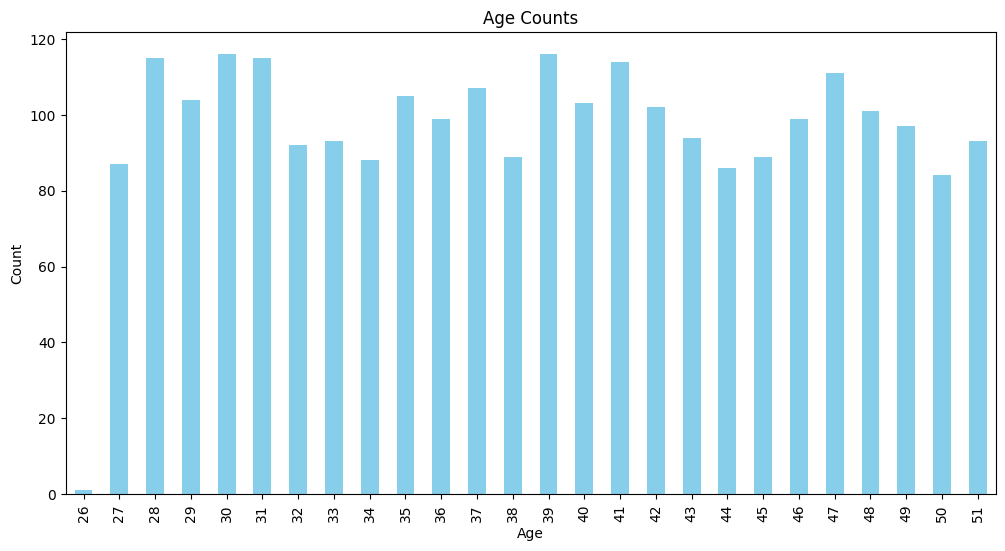

In [24]:
plt.figure(figsize=(12,6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [26]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date']= pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')



In [27]:
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334


In [28]:
df['Duration Months']= df['Duration'].apply(lambda x: math.ceil(x/30))
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352,12
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344,12
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340,12
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334,12


In [29]:
avarage_duration= df['Duration Months'].mean()
avarage_duration

10.7808

In [30]:
print(f"Avarage Duration:{avarage_duration}")

Avarage Duration:10.7808


In [31]:
df['LTV'] = df['Monthly Revenue'] * df['Duration Months']

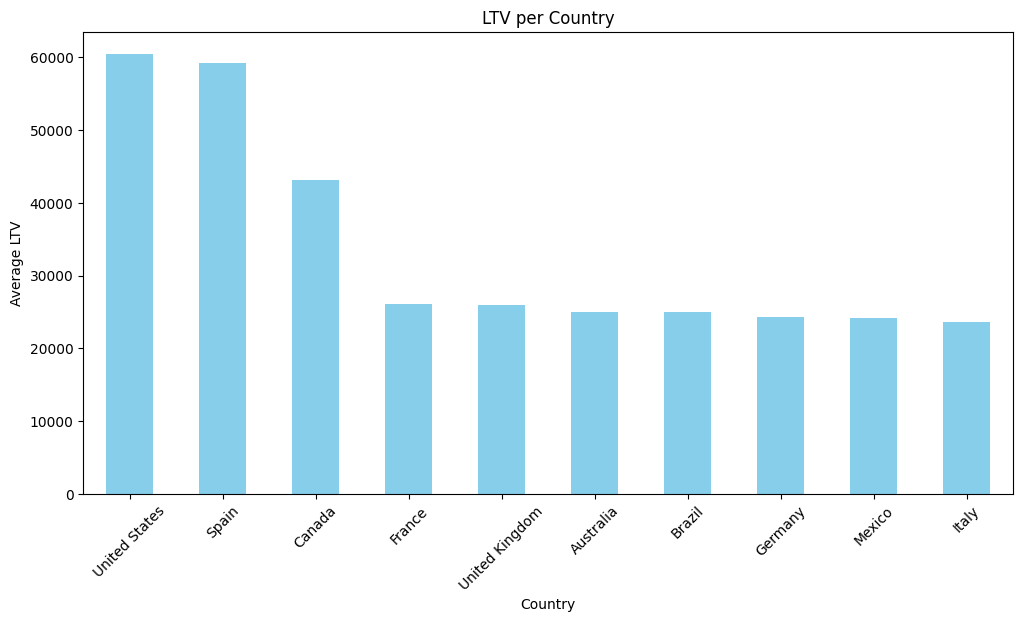

In [32]:
ltv_per_country_sum= df.groupby('Country')['LTV'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
ltv_per_country_sum.plot(kind='bar', color='skyblue')
plt.title('LTV per Country')
plt.xlabel('Country')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show()

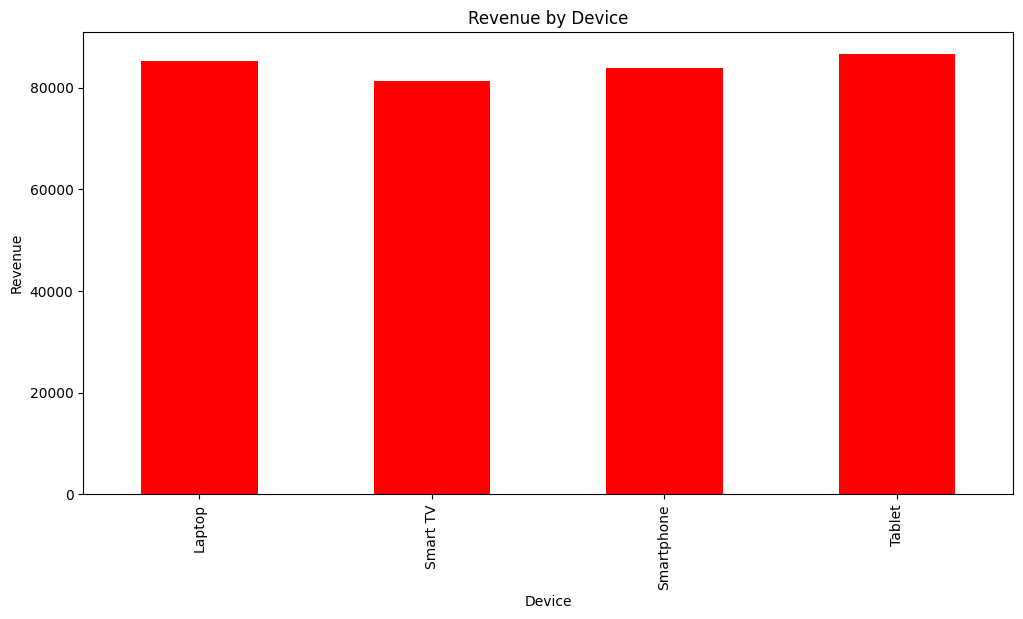

In [34]:
revenue_by_device= df.groupby('Device')['LTV'].sum()
plt.figure(figsize=(12,6))
revenue_by_device.plot(kind='bar', color='red')
plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Revenue')
plt.show()

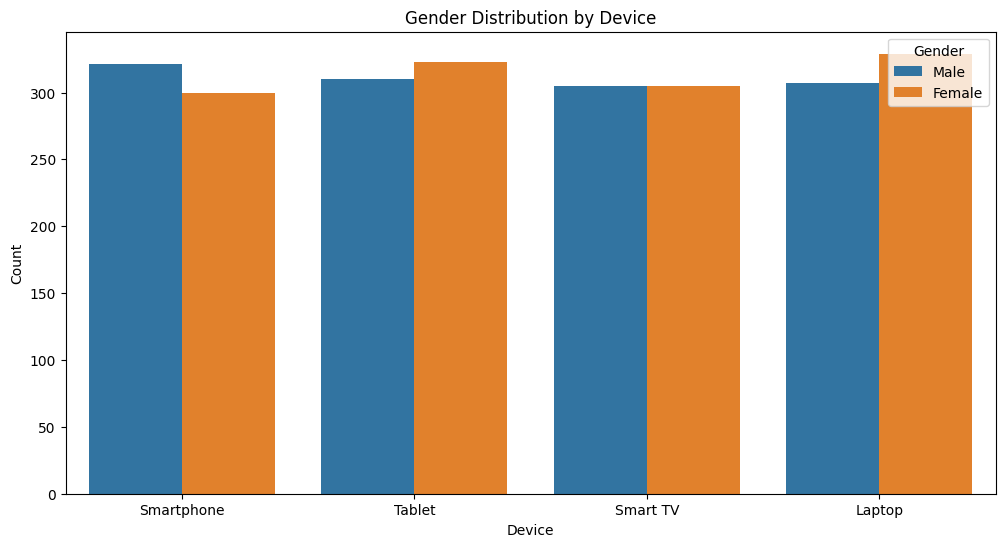

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='Device', hue='Gender', data=df, )
plt.title('Gender Distribution by Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.show()